<a href="https://colab.research.google.com/github/dishanayak144/ChurnRate/blob/main/ChurnRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
! pip install opendatasets

In [7]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dishastudies
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


100%|██████████| 50.1k/50.1k [00:00<00:00, 35.6MB/s]

In [8]:
emp_df= pd.read_csv("/content/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Data Cleaning and Preprocessing**

In [11]:
emp_df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


No missing Values in the dataset!


## **Exploratory Data Analysis**

In [13]:
emp_df.shape

(1470, 35)

1470 rows and 35 columns

In [14]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
emp_df.select_dtypes(include=['object']).dtypes

,0
Attrition,object
BusinessTravel,object
Department,object
EducationField,object
Gender,object
JobRole,object
MaritalStatus,object
Over18,object
OverTime,object


These are the columns that are categorical in nature

In [16]:
emp_df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [37]:
emp_df['Atrrition']= emp_df['Attrition'].factorize(['No', 'Yes'])[0]


Attrition: No:0, Yes:1


In [38]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Atrrition
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,0


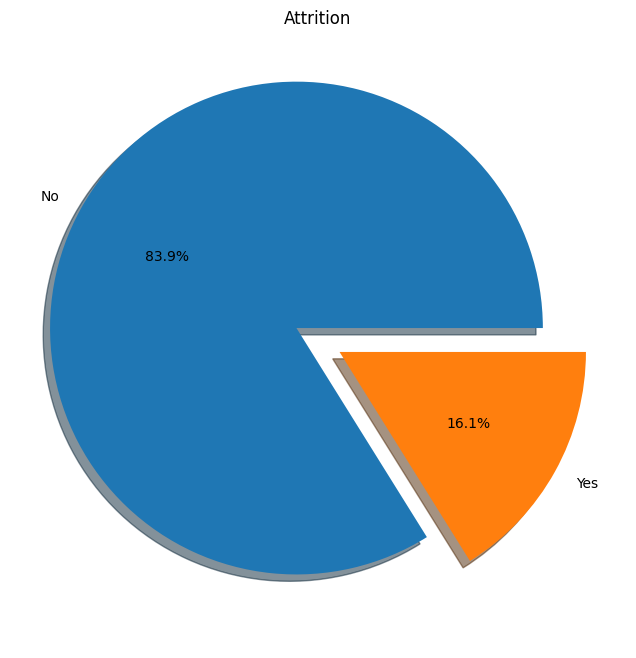

In [24]:
plt.figure(figsize=(8,8))
pie= emp_df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No','Yes'], autopct= '%1.1f%%', shadow=True);
plt.title('Attrition')
plt.show()

84% employees in this dataset have not left the company

In [25]:
emp_df.select_dtypes(include=['int64']).dtypes

,0
Age,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
HourlyRate,int64
JobInvolvement,int64
JobLevel,int64


The above are columns numerical in nature

<ipython-input-27-3026246f03ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emp_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

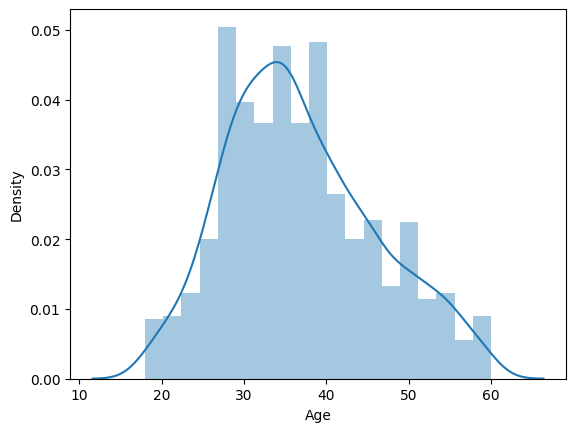

In [27]:
sns.distplot(emp_df['Age'])
#distplot used to visualize the distribution of a single variable. It combines a histogram and a kernel density estimate (KDE) plot to give you a comprehensive view of the data's distribution.

In [28]:
emp_df[['Age']].value_counts().sort_values(ascending=False).head(10)

,count
Age,
35,78
34,77
36,69
31,69
29,68
32,61
30,60
38,58
33,58


In [30]:
emp_df[['Age']].value_counts().sort_values(ascending=False).tail(10)

,count
Age,
56,14
23,14
58,14
21,13
20,11
59,10
19,9
18,8
60,5


Most employees are in their mid 30s having the most highest count and lowest are people around the age of 60 or less than 20

In [31]:
emp_df['StandardHours'].value_counts()

,count
StandardHours,
80,1470


In [32]:
emp_df['EmployeeCount'].value_counts()

,count
EmployeeCount,
1,1470


In [40]:
emp_df= emp_df.drop(['EmployeeCount', 'StandardHours'], axis=1)

corr= emp_df.corr()
plt.figure(figsize=(12,12))
sns.heatplot(corr, cbar=True, square=True, fmt='.1f', annot=True, cmap='Reds')

ValueError: could not convert string to float: 'Travel_Rarely'

<Axes: >

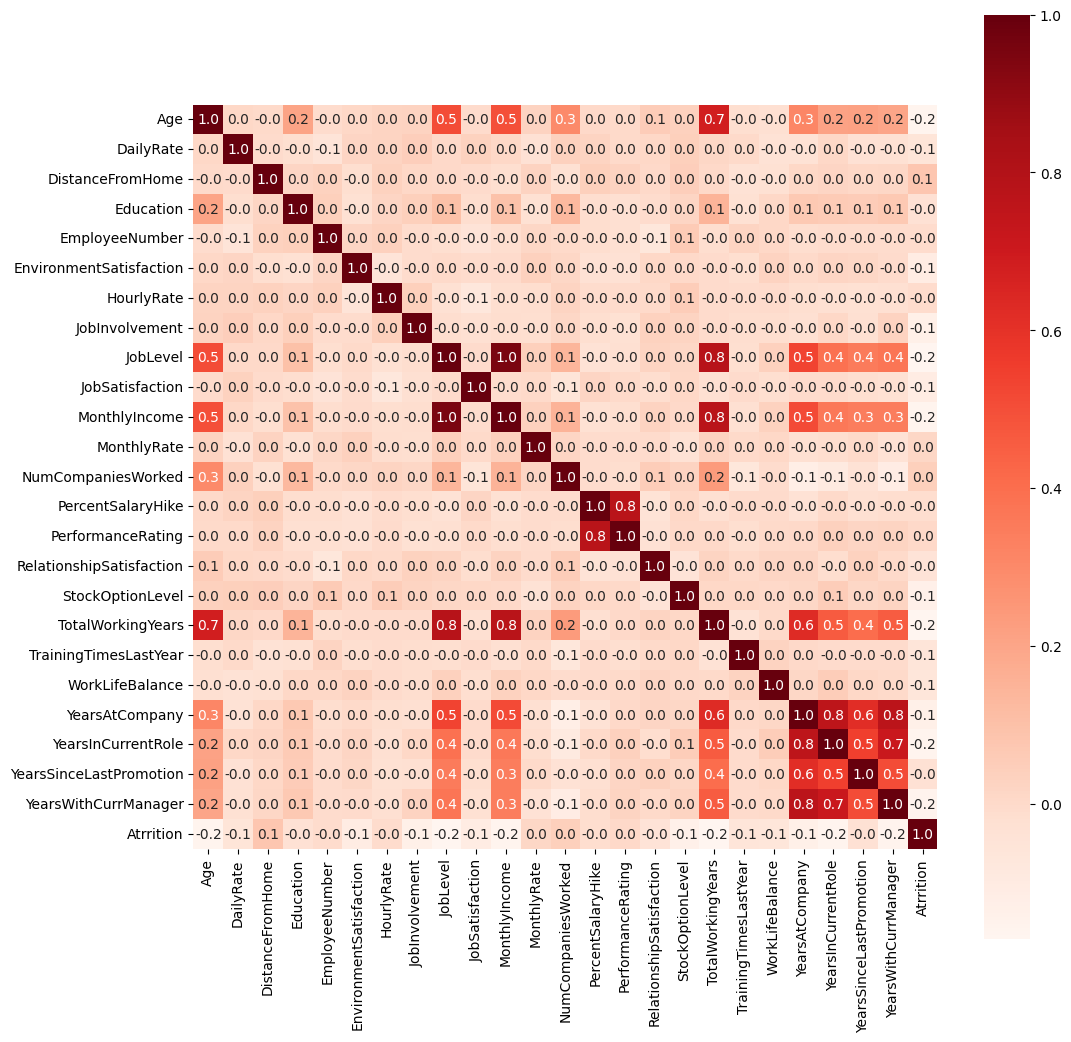

In [41]:
# Drop or encode categorical columns before calculating correlation
categorical_cols = emp_df.select_dtypes(include=['object']).columns

# Option 1: Drop categorical columns
emp_df_numeric = emp_df.drop(columns=categorical_cols)

# Option 2: One-hot encode categorical columns
# emp_df_encoded = pd.get_dummies(emp_df, columns=categorical_cols)


# Calculate correlation on numerical data only
corr = emp_df_numeric.corr()  # or corr = emp_df_encoded.corr() if you used one-hot encoding

plt.figure(figsize=(12, 12))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, cmap='Reds')

We have selected only numeric columns and created a correlation heatmap.

We can see that there is a high correlation between Employees that are senior in age and columns Years At Company, Years in Current Role, Years since last promotion, Years with current manager.

This indicates that a lot of employees remain in their current role and also under the same manager as years pass by, which could also mean there aren;t much promotion opportunities and could be a major factor contributing to attrition.

<Axes: ylabel='YearsAtCompany'>

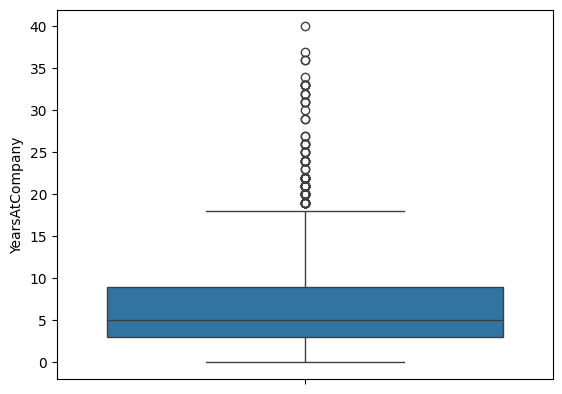

In [42]:
sns.boxplot(emp_df['YearsAtCompany'])

Most employees remain in the company for 3 to 9 years with median being 5 years.

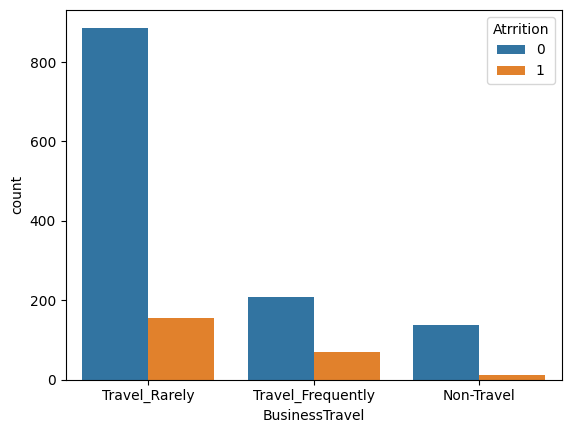

In [44]:
sns.countplot(x='BusinessTravel', hue='Atrrition', data=emp_df);

Most employees who rarely travel don't leave the company, however, the difference is not much comoared to employees who travel frequently or don't.

Thus Travelling frequency does'nt have much impact on attrition.

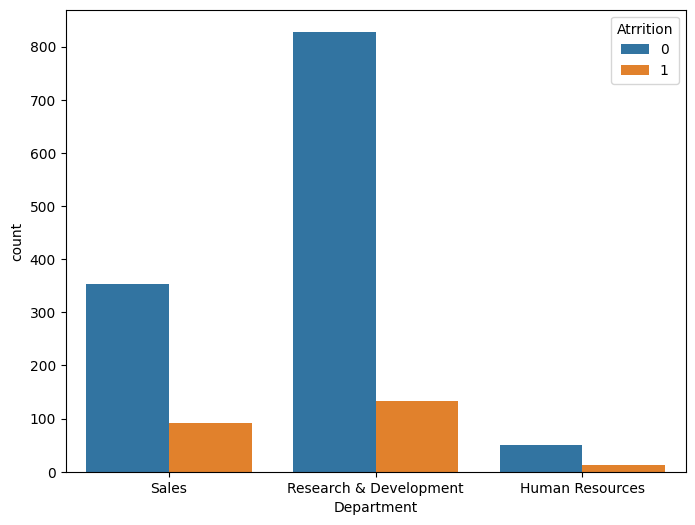

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Atrrition', data=emp_df);

Here, more attritions are from the Research and Development Dept., followed by sales department and the least from Human resourses department.

However, percentage wise, HR has most attritions if compared with ratio with total employees in each department.

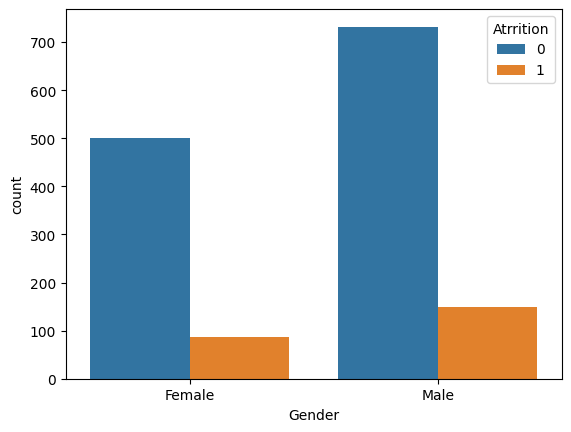

In [48]:
sns.countplot(x='Gender', hue='Atrrition', data=emp_df);

Most male employees have higher attrition rate compared to female employees.
However, there isn't much difference between the two genders,thus not very relevant comparison.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

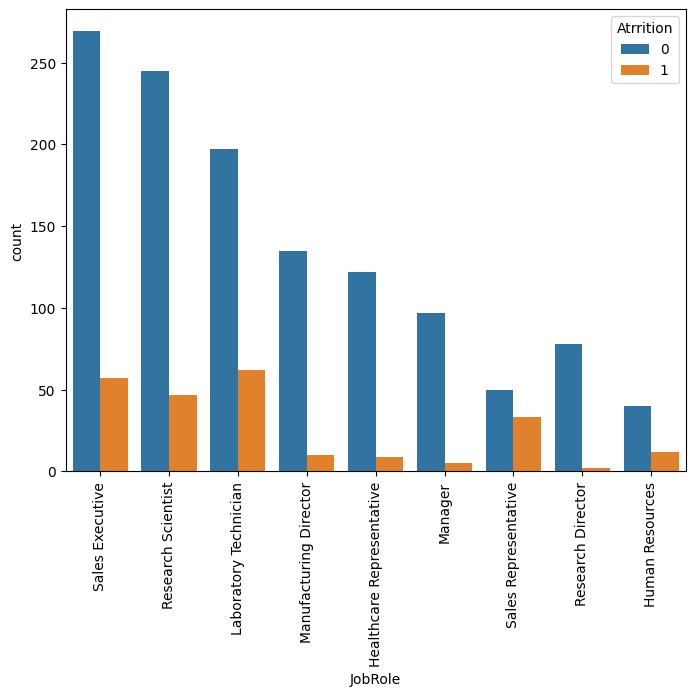

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Atrrition', data=emp_df)
plt.xticks(rotation=90)

Among all job roles, most laboratory technicians left their jobs, followed by sales executives, and research scientists. And percentage wise in each job role, most employees from HR and sales represantatives left their jobs.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

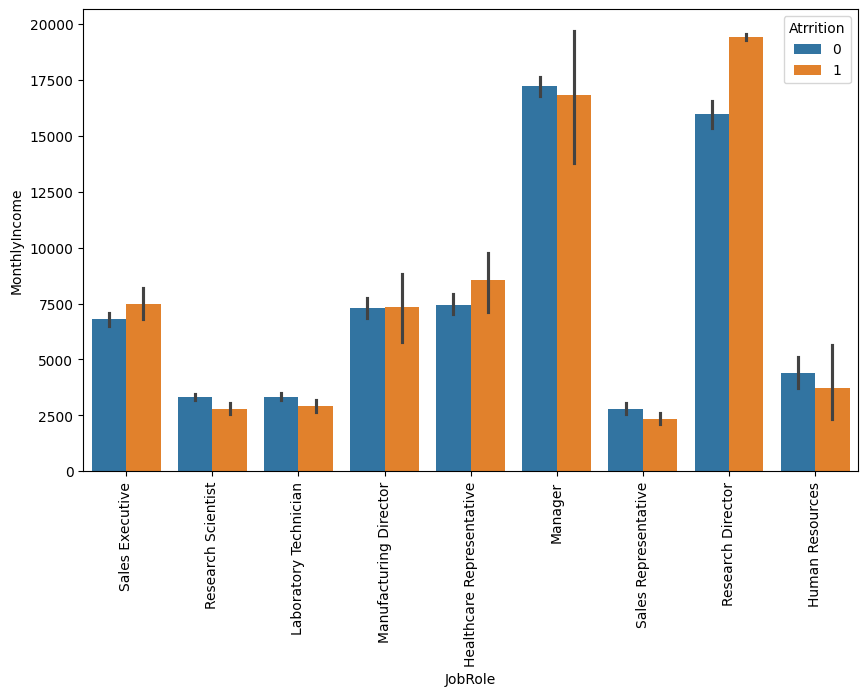

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Atrrition', data=emp_df)
plt.xticks(rotation=90)

As expected, Laboratory technicians, research scientists, sales executives, sales represantatives, and HR employees have comparatively very low salaries, contributing more to the impact of attrition in the previous graphs.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

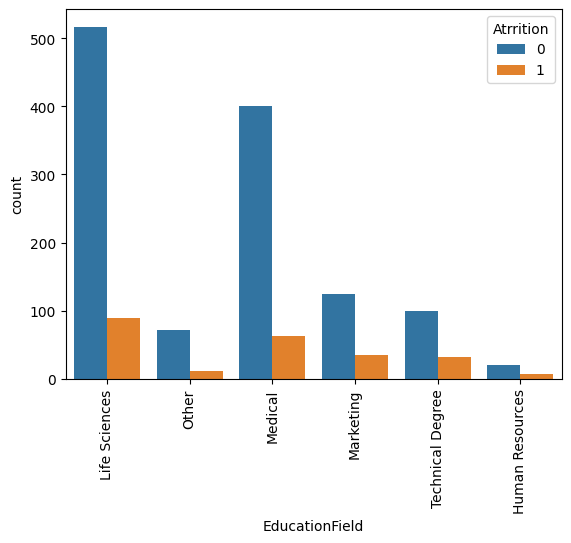

In [58]:
sns.countplot(x='EducationField', hue='Atrrition', data=emp_df)
plt.xticks(rotation=90)

Education background of employees do not contribute much to attritions since the percentage is almost same for all education backgrounds.

# **Splitting Data**

In [60]:
x= emp_df.drop(['Atrrition','BusinessTravel','EducationField','OverTime'], axis=1)
y= emp_df['Atrrition']

In [62]:

x['Department']= preprocessing.LabelEncoder().fit_transform(x['Department'])
x['Education']= preprocessing.LabelEncoder().fit_transform(x['Education'])
x['Gender']= preprocessing.LabelEncoder().fit_transform(x['Gender'])
x['JobRole']= preprocessing.LabelEncoder().fit_transform(x['JobRole'])
x['MaritalStatus']= preprocessing.LabelEncoder().fit_transform(x['MaritalStatus'])
x['Over18']= preprocessing.LabelEncoder().fit_transform(x['Over18'])

In [63]:
Scaler= StandardScaler()
x = Scaler.fit_transform(x)

In [64]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [65]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1470, 29)
(1176, 29)
(294, 29)


# **Model Building**

W e will use three models, RandomForest, Logistic Regression and SVM for the classification problem.

In [68]:
models= []
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

n_folds=5
results=[]
for name, model in models:
  kfold= model_selection.KFold(n_splits=n_folds)
  print("Testing model:", name)

  cv_results= model_selection.cross_val_score(model, x_train, y_train, cv= kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)

  model.fit(x_train, y_train)

  train_pred= model.predict(x_train)
  Training_score= accuracy_score(train_pred, y_train)
  test_pred= model.predict(x_test)
  Test_score= accuracy_score(test_pred, y_test)

  results.append(cv_results)

  msg= f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Test Accuracy: {Test_score}"
  print(msg + "\n")

Testing model: Random Forest
Cross_Val Mean: 0.7981994503994925, Training Accuracy: 1.0, Test Accuracy: 0.8401360544217688

Testing model: Logistic Regression
Cross_Val Mean: 0.8219775205615518, Training Accuracy: 0.8656462585034014, Test Accuracy: 0.8571428571428571

Testing model: SVM
Cross_Val Mean: 0.7660141990060427, Training Accuracy: 0.8392857142857143, Test Accuracy: 0.8367346938775511



From all 3 models, the average cross validation score is almost similar and highly relative.

Interestingly, we can see that RandomForest gives 100% accuracy while the rest 2 guve approx 85% accuracy.

However, for the the testing data, all models give approx 85% with Logistic Regression giving the highest accuracy.

# **Conclusion**

So basically the workflow is as follows:

 Import libraries and dataset
 -> check for missing values
 -> perform necessary imputation
 -> perform necessary preprocessing
 -> exploratory data analysis
 -> label encoding
 -> data standardization
 -> split data
 -> train model
 -> check its accuracy
 -> improve model or try other ones.